In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
dfRealTime = pd.read_csv('dados/vehicles_1602262119519.txt')
dfRealTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36085 entries, 0 to 36084
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vehicle_id        36085 non-null  object 
 1   route_id          36085 non-null  object 
 2    route_direction  36085 non-null  int64  
 3   timestamp         36085 non-null  int64  
 4   lat               36085 non-null  float64
 5   lng               36085 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.7+ MB


In [3]:
import time

df1 = dfRealTime[dfRealTime.vehicle_id=='1_51230'][dfRealTime[' route_direction']==0]
df1Time = np.array(df1)
result = []
for item in df1Time:
    result.append(time.strftime("%H:%M:%S", time.localtime(item[3]/1000)))
result

<ipython-input-3-a3b6208095a3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = dfRealTime[dfRealTime.vehicle_id=='1_51230'][dfRealTime[' route_direction']==0]


['11:31:42',
 '11:32:42',
 '11:33:27',
 '11:34:52',
 '11:35:38',
 '11:36:22',
 '11:38:38',
 '11:39:22',
 '11:40:53',
 '11:42:23',
 '11:43:54',
 '11:44:38',
 '11:45:23',
 '11:46:54',
 '11:47:38',
 '11:48:24',
 '11:49:54',
 '11:50:39',
 '11:51:23',
 '11:52:54',
 '11:53:39',
 '11:54:24',
 '11:55:54',
 '11:57:24',
 '11:58:55',
 '11:59:40',
 '12:00:25',
 '12:01:55',
 '12:02:40',
 '12:03:24',
 '12:05:50',
 '12:06:36',
 '12:07:21',
 '12:08:15',
 '13:11:57',
 '13:13:41',
 '13:14:25',
 '13:15:55',
 '13:16:41',
 '13:17:27',
 '13:18:57',
 '13:19:42',
 '13:21:56',
 '13:22:22',
 '13:23:52',
 '13:24:38',
 '13:25:23',
 '13:26:52',
 '13:27:38',
 '13:28:23',
 '13:29:52',
 '13:30:37',
 '13:31:23',
 '13:32:54',
 '13:33:39',
 '13:34:23',
 '13:35:54',
 '13:36:39',
 '13:38:54',
 '13:39:38',
 '13:40:24',
 '13:41:54',
 '13:42:38',
 '13:43:24',
 '13:44:54',
 '13:45:38',
 '13:46:03',
 '17:24:41',
 '17:25:26',
 '17:26:56',
 '17:27:41',
 '17:28:25',
 '19:53:11',
 '19:55:27',
 '19:56:57',
 '19:57:42',
 '19:58:27',

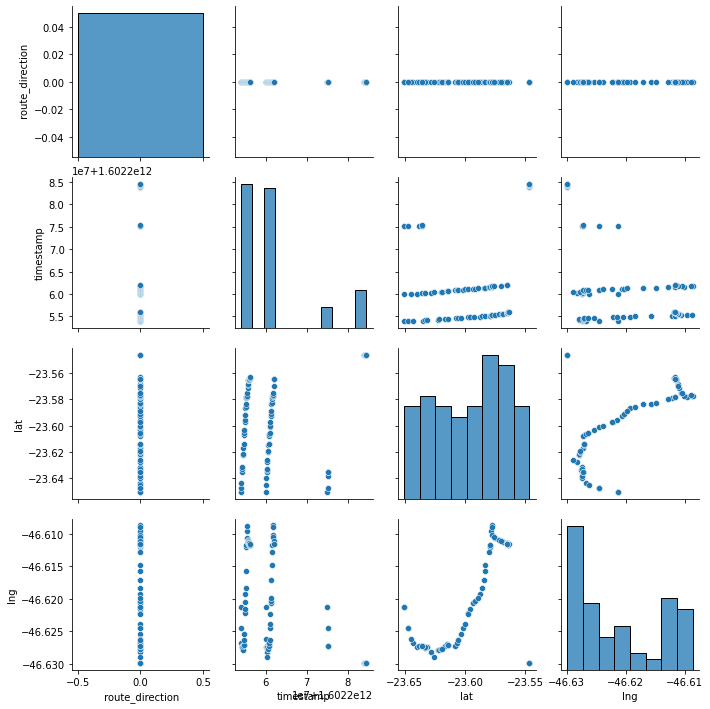

In [4]:
sb.pairplot(df1)

In [5]:
df1[:1]

,vehicle_id,route_id,route_direction,timestamp,lat,lng
1245,1_51230,ed5ea2bf-7194-42fb-89a9-8794a74a27df,0,1602253902000,-23.650437,-46.621286


In [6]:
sb.lineplot(x="timestamp", y="lng",
             hue="region", style="event",
             data=df1)

ValueError: Could not interpret value `region` for parameter `hue`

In [ ]:
sb.pairplot(dfRealTime)

In [ ]:
X = np.array(dfRealTime.drop(['vehicle_id', 'route_id', ' route_direction', 'timestamp'], axis=1))

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.fit(X)
kmeans.labels_

In [ ]:
dfAgency = pd.read_csv("dados/agency.txt")
dfAgency.info()

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

In [ ]:
pl.figure(figsize=(16,8))
pl.plot(K, distortions, 'bx-')
pl.xlabel('k')
pl.ylabel('Distortion')
pl.title('The Elbow Method showing the optimal k')
pl.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4, random_state=0)
kmeanModel.fit(X)

In [ ]:
dfRealTime['k_means']=kmeanModel.predict(X)

sb.pairplot(dfRealTime, hue='k_means')